# Лабораторная работа №2
# Вариант 7 (Набор данных: Mushrooms; Классификаторы: 2, 3)


## ФИО студента: Скрынский Дмитрий
## Группа: 17-ВМ

### Задачи:

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

## Начало работы

In [2]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

%matplotlib inline
mushrooms = pd.read_csv('mushrooms.csv')

### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [3]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


1. *cap-shap* - __Форма шляпки__
0. *cap-surface* - __Поверхность шляпки__
0. *cap-color* - __Цвет шляпки__
0. *bruises* - __Пятна__
0. *odor* - __Запах__
0. *gill-attachment* - __Форма пластинок (ламел)__
0. *gill-spacing* -__Расстояние между пластинками__
0. *gill-size* - __Размер пластинок__
0. *gill-color* - __Цвет пластинок__
0. *stalk-shape* - __Форма ножки__
0. *stalk-root* - __Корень__
0. *stalk-surface-above-ring* - __Форма ножки выше юбки__
0. *stalk-surface-below-ring* - __Форма ножки ниже юбки__
0. *stalk-color-above-ring* - __Цвет ножки выше юбки__
0. *stalk-color-below-ring* - __Цвет ножки ниже юбки__
0. *veil-type* - __Форма юбки__
0. *veil-color* - __Цвет юбки__
0. *ring-number* - __Количество колец__
0. *ring-type* - __Тип кольца__
0. *spore-print-color* - __Цвет спор__
0. *population* - __Популяция__
0. *habitat* - __Среда обитания__

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [4]:
print("Размер набора данных до удаления дубликатов: %d" % len(mushrooms))
mushrooms.drop_duplicates(keep="first", inplace=True)
print("Размер набора данных после удаления дубликатов: %d" % len(mushrooms))

Размер набора данных до удаления дубликатов: 8124
Размер набора данных после удаления дубликатов: 8124


### 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

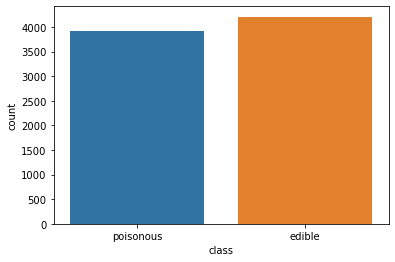

In [7]:
sns.barplot(data=pd.DataFrame({
    'count': [
        len(mushrooms.loc[mushrooms["class"] == 'p']),
        len(mushrooms.loc[mushrooms["class"] == 'e']),
    ],
    'class': [
        'poisonous',
        'edible',
    ],
}), y='count', x='class')

*Вывод*: Поскольку объем данных классов отличается незначительно, будем считать,что сами классы сбалансированы. 